In [13]:
# Perform one hot encoding on label
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torch.utils.data import Dataset, DataLoader
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn


In [14]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt


In [15]:
import sys
sys.path.append('../../../utils')  # Adds the parent directory to the system path
sys.path.append('../../../models')  # Adds the parent directory to the system path


In [16]:
from UNET import UNetBaseline

In [17]:
# Load the trained model
state_dict = torch.load('/home/sfonseka/dev/SRST/srst-dataloader/experiments/UNET/asphalt/runs/UNET_binary_grayscale_asphalt_1704597437.863613/models/best_model_UNET_binary_grayscale_asphalt_1704597437.863613.pt',
                   map_location=torch.device('cpu'))


In [18]:
model = UNetBaseline(out_classes=1)

In [19]:
# Load the state dict into the model
model.load_state_dict(state_dict)
model.eval()  # Set the model to evaluation mode

UNetBaseline(
  (down_conv1): DownBlock(
    (double_conv): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down_sample): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_conv2): DownBlock(
    (double_conv): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [20]:

# Load and preprocess the input image
test_img_path='/projects/0/gusr51794/srst_scratch_drive/binary_training/images/512/asphalt/c_set5_2_512_13_3.jpg'


In [21]:
# load and preprocess the image
img = cv2.cvtColor(cv2.imread(os.path.join(test_img_path)), cv2.COLOR_BGR2RGB)

img_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(), # convert the image to a tensor
])
img = img_transforms(img)
img = img.unsqueeze(0) # add batch dimension to the image tensor

In [22]:
print(img.shape)

torch.Size([1, 3, 512, 512])


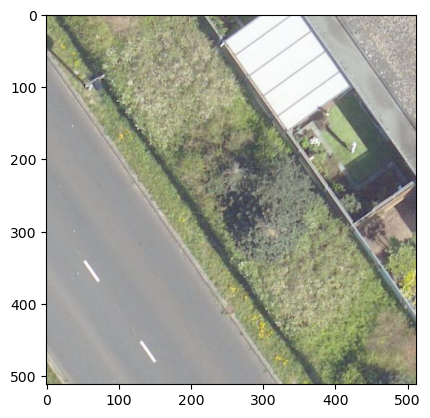

In [23]:
# Remove the batch dimension, convert to numpy, and transpose to (height, width, channels)
img_np = img.squeeze(0).cpu().numpy().transpose((1, 2, 0))

plt.imshow(img_np)
plt.show()

In [24]:
with torch.no_grad():
    output = model(img)



In [25]:
import pickle

# Move to CPU and convert to numpy
output_np = output.cpu().numpy()

# Save with pickle
with open('output.pkl', 'wb') as f:
    pickle.dump(output_np, f)

In [26]:
image_np = img.squeeze(0).numpy()


In [27]:
output_binary_np = output.squeeze(0).squeeze(0).cpu().numpy()  # Squeeze the channel dimension


Text(0.5, 1.0, 'Predicted Image')

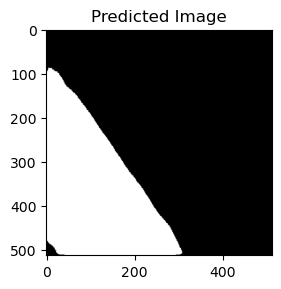

In [31]:
# Convert to binary by thresholding
output_binary = output_binary_np < 0.5

# Plot the binary image
plt.subplot(1, 2, 2)
plt.imshow(output_binary, cmap='binary')
plt.title('Predicted Image')

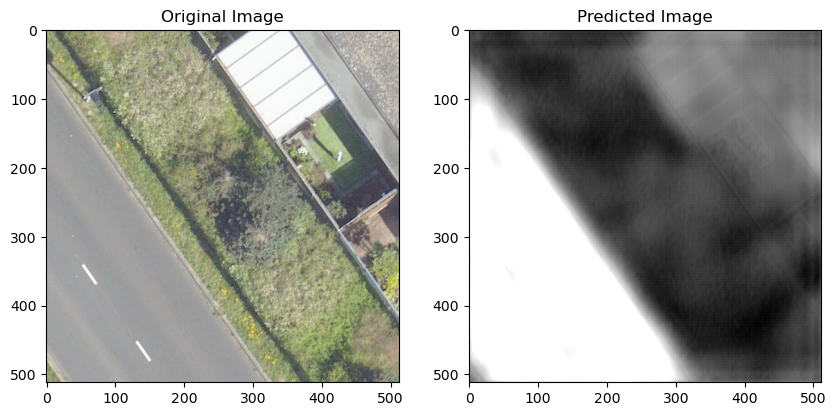

In [29]:
# Transpose the image
image_np_transposed = np.transpose(image_np, (1, 2, 0))

# Create a new matplotlib figure
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image_np_transposed, cmap='gray')
plt.title('Original Image')

# Plot the predicted image
plt.subplot(1, 2, 2)
plt.imshow(output_binary_np, cmap='gray')
plt.title('Predicted Image')

# Display the plots
plt.show()

TypeError: Invalid shape (3, 512, 512) for image data

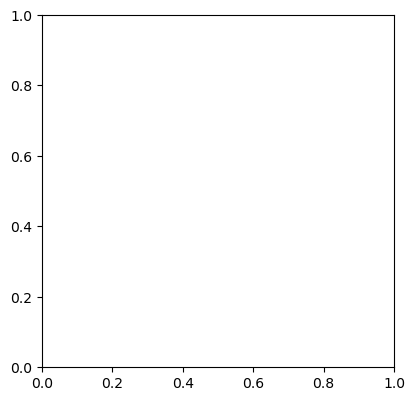

In [28]:
# Create a new matplotlib figure
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')

# Plot the predicted image
plt.subplot(1, 2, 2)
plt.imshow(output_binary_np, cmap='gray')
plt.title('Predicted Image')

# Display the plots
plt.show()